# Eleonora Baracco__Progetto Indian Premier League

Dataset = https://www.kaggle.com/manasgarg/ipl

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import plotly as py
import cufflinks as cf

In [3]:
from plotly.offline import iplot

In [4]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [5]:
import ipywidgets as widgets

In [6]:
# carico i due dataset
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')#

#### Osservo i dati per capire come pulirli ed utilizzarli

In [7]:
matches.shape

(636, 18)

In [8]:
deliveries.shape

(150460, 21)

In [9]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
matches.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [11]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [12]:
deliveries.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
150459,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,6,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


### Data Cleaning

Controllo che la colonna 'umpire3' sia composta solo da Nan prima di rimuoverla

In [13]:
matches['umpire3'].value_counts()

Series([], Name: umpire3, dtype: int64)

In [14]:
matches.drop('umpire3', inplace= True, axis =1)

Rimuovo tutti i Nan e li sostituisco con una stringa

In [15]:
matches.fillna('---', inplace=True)

In [16]:
#controllo di non aver perso righe o colonne del dataset
matches.shape

(636, 17)

Pulisco nello stesso modo il dataset 'deliveries'

In [17]:
deliveries.fillna('---', inplace=True)

## IL TORNEO

### Partite per stagione

In [18]:
ordinato = matches.sort_values('date')
match_season = ordinato['season'].value_counts()
ordinato.reset_index(inplace = True, drop = True)
match_season

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2015    59
2017    59
2008    58
2009    57
Name: season, dtype: int64

In [19]:
match_season.describe()

count    10.000000
mean     63.600000
std       7.501111
min      57.000000
25%      59.000000
50%      60.000000
75%      69.750000
max      76.000000
Name: season, dtype: float64

### Gli stadi che ospitano più partite

In [20]:
stadi = matches['venue'].value_counts()
stadi

M Chinnaswamy Stadium                                   66
Eden Gardens                                            61
Feroz Shah Kotla                                        60
Wankhede Stadium                                        57
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Maharashtra Cricket Association Stadium                 15
Kingsmead                                               15
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Brabourne Stadium                                       11
Punjab Cricket Association IS Bindra Stadium, Mohali    11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     

### Le città che ospitano più partite

In [21]:
matches['city'].value_counts()

Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Ahmedabad         12
Centurion         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Port Elizabeth     7
Ranchi             7
Cape Town          7
---                7
Abu Dhabi          7
Cuttack            7
Sharjah            6
Raipur             6
Indore             5
Kochi              5
Kanpur             4
Nagpur             3
Kimberley          3
East London        3
Bloemfontein       2
Name: city, dtype: int64

## LE SQUADRE

### La presentazione delle squadre

In [22]:
t1 = pd.DataFrame(matches['team1'].value_counts())
t2 = pd.DataFrame(matches['team2'].value_counts())
t1['team2'] = t2
t1['match_played'] = t1.sum(1)
t1['win'] = matches['winner'].value_counts()
t1['loss'] = t1['match_played']-t1['win']
t1['win_rate'] = t1['win'].div(t1['match_played']).round(2)
t1['loss_rate'] = t1['loss'].div(t1['match_played']).round(2)
t1['toss_winning'] = (matches['toss_winner'].value_counts())
t1

,team1,team2,match_played,win,loss,win_rate,loss_rate,toss_winning
Mumbai Indians,82,75,157,92,65,0.59,0.41,85
Chennai Super Kings,77,54,131,79,52,0.60,0.40,66
Kings XI Punjab,77,71,148,70,78,0.47,0.53,68
Royal Challengers Bangalore,70,82,152,73,79,0.48,0.52,70
Kolkata Knight Riders,68,80,148,77,71,0.52,0.48,78
Delhi Daredevils,63,84,147,62,85,0.42,0.58,72
Rajasthan Royals,54,64,118,63,55,0.53,0.47,63
Sunrisers Hyderabad,46,30,76,42,34,0.55,0.45,35
Deccan Chargers,43,32,75,29,46,0.39,0.61,43
Pune Warriors,20,26,46,12,34,0.26,0.74,20


#### Statistiche generali

In [23]:
t1.describe().round(2)

,team1,team2,match_played,win,loss,win_rate,loss_rate,toss_winning
count,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00
mean,45.43,45.43,90.86,45.21,45.64,0.47,0.52,45.43
std,28.85,30.36,58.01,31.79,28.12,0.10,0.10,29.48
min,7.00,7.00,14.00,5.00,6.00,0.26,0.38,6.00
25%,15.50,18.50,34.00,12.25,21.25,0.42,0.46,16.25
50%,50.00,43.00,97.00,52.00,49.00,0.48,0.52,53.00
75%,69.50,74.00,147.75,72.25,69.50,0.55,0.58,69.50
max,82.00,84.00,157.00,92.00,85.00,0.62,0.74,85.00


### Le squadre che hanno vinto più partite dal 2008 al 2017

#### In base al numero di vittorie

In [24]:
t1.sort_values('win', ascending = False)

,team1,team2,match_played,win,loss,win_rate,loss_rate,toss_winning
Mumbai Indians,82,75,157,92,65,0.59,0.41,85
Chennai Super Kings,77,54,131,79,52,0.60,0.40,66
Kolkata Knight Riders,68,80,148,77,71,0.52,0.48,78
Royal Challengers Bangalore,70,82,152,73,79,0.48,0.52,70
Kings XI Punjab,77,71,148,70,78,0.47,0.53,68
Rajasthan Royals,54,64,118,63,55,0.53,0.47,63
Delhi Daredevils,63,84,147,62,85,0.42,0.58,72
Sunrisers Hyderabad,46,30,76,42,34,0.55,0.45,35
Deccan Chargers,43,32,75,29,46,0.39,0.61,43
Gujarat Lions,14,16,30,13,17,0.43,0.57,15


#### In base al tasso di vincita

In [25]:
t1.sort_values('win_rate', ascending = False)

,team1,team2,match_played,win,loss,win_rate,loss_rate,toss_winning
Rising Pune Supergiant,8,8,16,10,6,0.62,0.38,6
Chennai Super Kings,77,54,131,79,52,0.60,0.40,66
Mumbai Indians,82,75,157,92,65,0.59,0.41,85
Sunrisers Hyderabad,46,30,76,42,34,0.55,0.45,35
Rajasthan Royals,54,64,118,63,55,0.53,0.47,63
Kolkata Knight Riders,68,80,148,77,71,0.52,0.48,78
Royal Challengers Bangalore,70,82,152,73,79,0.48,0.52,70
Kings XI Punjab,77,71,148,70,78,0.47,0.53,68
Gujarat Lions,14,16,30,13,17,0.43,0.57,15
Kochi Tuskers Kerala,7,7,14,6,8,0.43,0.57,8


Creo un dataset in cui osservare le vincite di ogni squadra per stagione, e ne creo un altro in cui per ogni stagione troviamo le squadre ordinate in base al numero di vincite

In [26]:
sum1 = pd.crosstab(matches['winner'], matches['season'])

In [27]:
cl_2008 = sum1.nlargest(15, 2008)
cl_2009 = sum1.nlargest(15, 2009)
cl_2010 = sum1.nlargest(15, 2010)
cl_2011 = sum1.nlargest(15, 2011)
cl_2012 = sum1.nlargest(15, 2012)
cl_2013 = sum1.nlargest(15, 2013)
cl_2014 = sum1.nlargest(15, 2014)
cl_2015 = sum1.nlargest(15, 2015)
cl_2016 = sum1.nlargest(15, 2016)
cl_2017 = sum1.nlargest(15, 2017)

In [28]:
d = {'2008':cl_2008.index, '2009': cl_2009.index, '2010': cl_2010.index, '2011': cl_2011.index, '2012': cl_2012.index, '2013': cl_2013.index, '2014':cl_2014.index,'2015':cl_2015.index,'2016':cl_2016.index, '2017':cl_2017.index }
cl_tot = pd.DataFrame(d)
cl_tot.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

### Le squadre che hanno vinto di più nell' intera stagione

In [29]:
a = cl_tot.apply(pd.value_counts, axis= 1).fillna(0)
a = a.convert_dtypes()
a= a.head(4)
a.index = ['winners', 'runner-up', 'third', 'fourth']
a

,---,Chennai Super Kings,Deccan Chargers,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
winners,0,2,0,1,0,1,0,1,3,0,1,0,0,0,1
runner-up,0,2,1,1,1,1,0,1,2,0,0,1,0,0,0
third,0,3,1,0,0,0,0,1,0,0,1,0,0,4,0
fourth,0,1,0,1,0,0,0,3,2,0,0,0,0,1,2


In [30]:
a.iplot(kind='bar', xTitle = 'position ', yTitle = 'count', title = 'Best teams',colors =py.colors.qualitative.Alphabet, theme = 'solar')

In [31]:
#c = a.transpose()
#c = c.sort_values('winners', ascending = False)
#c

In [32]:
#c.iplot(kind='bar', xTitle= 'teams', yTitle= 'counts', title = 'Best teams')

#### Statistiche sulle vittorie  [2008-2017]¶

In [33]:
sum1.describe().round(2)

season,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00
mean,3.87,3.80,4.00,4.87,4.93,5.07,4.00,3.93,4.00,3.93
std,4.47,4.04,4.14,3.96,4.70,5.04,4.54,3.94,4.19,4.37
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00
50%,2.00,3.00,4.00,6.00,4.00,4.00,2.00,3.00,4.00,3.00
75%,7.00,7.50,7.50,7.50,9.00,9.50,7.00,7.00,7.50,7.50
max,13.00,10.00,11.00,11.00,12.00,13.00,12.00,10.00,11.00,12.00


In [34]:
sum1.iplot(kind = 'box', xTitle = 'season', yTitle = 'number of win', title= 'le vittorie per stagione')

#### Statistiche sulle vittorie delle squadre [2008-2017]

In [35]:
s = sum1.transpose()
s.describe().round(2)


winner,---,Chennai Super Kings,Deccan Chargers,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
count,10.00,10.00,10.0,10.00,10.00,10.00,10.0,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00
mean,0.30,7.90,2.9,6.20,1.30,7.00,0.6,7.70,9.20,1.20,6.30,1.00,0.50,7.30,4.20
std,0.67,4.31,3.6,2.86,2.98,2.79,1.9,2.58,2.57,1.93,4.06,3.16,1.58,2.41,4.64
min,0.00,0.00,0.0,2.00,0.00,3.00,0.0,3.00,5.00,0.00,0.00,0.00,0.00,3.00,0.00
25%,0.00,8.25,0.0,4.25,0.00,4.75,0.0,6.25,7.00,0.00,6.00,0.00,0.00,5.75,0.00
50%,0.00,9.50,1.0,6.50,0.00,7.00,0.0,7.50,10.00,0.00,6.50,0.00,0.00,8.00,3.00
75%,0.00,10.00,5.5,7.00,0.00,8.00,0.0,8.75,10.75,3.00,7.00,0.00,0.00,9.00,7.75
max,2.00,12.00,9.0,11.00,9.00,12.00,6.0,12.00,13.00,4.00,13.00,10.00,5.00,10.00,11.00


In [36]:
s.iplot(kind = 'box', xTitle = 'teams', yTitle = 'wins', title = 'Quanto vincono le squadre')

### L'andamento delle squadre dal 2008 al 2017

#### Le partite giocate

In [37]:
match_year = pd.crosstab(matches['team1'], matches['season'])

match_year2 = pd.crosstab(matches['team2'], matches['season'])
match_year = match_year + match_year2
match_year

season,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
team1,,,,,,,,,,
Chennai Super Kings,16,14,16,16,18,18,16,17,0,0
Deccan Chargers,14,16,16,14,15,0,0,0,0,0
Delhi Daredevils,14,15,14,14,18,16,14,14,14,14
Gujarat Lions,0,0,0,0,0,0,0,0,16,14
Kings XI Punjab,15,14,14,14,16,16,17,14,14,14
Kochi Tuskers Kerala,0,0,0,14,0,0,0,0,0,0
Kolkata Knight Riders,13,13,14,15,17,16,16,13,15,16
Mumbai Indians,14,13,16,16,17,19,15,16,14,17
Pune Warriors,0,0,0,14,16,16,0,0,0,0


#### Le partite vinte

In [38]:
sum1

season,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
winner,,,,,,,,,,
---,0,0,0,1,0,0,0,2,0,0
Chennai Super Kings,9,8,9,11,10,12,10,10,0,0
Deccan Chargers,2,9,8,6,4,0,0,0,0,0
Delhi Daredevils,7,10,7,4,11,3,2,5,7,6
Gujarat Lions,0,0,0,0,0,0,0,0,9,4
Kings XI Punjab,10,7,4,7,8,8,12,3,4,7
Kochi Tuskers Kerala,0,0,0,6,0,0,0,0,0,0
Kolkata Knight Riders,6,3,7,8,12,6,11,7,8,9
Mumbai Indians,7,5,11,10,10,13,7,10,7,12


#### Le partite perse

In [39]:
loss_year = match_year - sum1
loss_year = loss_year.convert_dtypes().dropna()
loss_year

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Chennai Super Kings,7,6,7,5,8,6,6,7,0,0
Deccan Chargers,12,7,8,8,11,0,0,0,0,0
Delhi Daredevils,7,5,7,10,7,13,12,9,7,8
Gujarat Lions,0,0,0,0,0,0,0,0,7,10
Kings XI Punjab,5,7,10,7,8,8,5,11,10,7
Kochi Tuskers Kerala,0,0,0,8,0,0,0,0,0,0
Kolkata Knight Riders,7,10,7,7,5,10,5,6,7,7
Mumbai Indians,7,8,5,6,7,6,8,6,7,5
Pune Warriors,0,0,0,10,12,12,0,0,0,0
Rajasthan Royals,3,7,8,7,9,7,7,7,0,0


#### tasso di vincita

In [40]:
rate_win_year = sum1.div(match_year).round(2)
rate_win_year

season,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
---,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chennai Super Kings,0.56,0.57,0.56,0.69,0.56,0.67,0.62,0.59,NaN,NaN
Deccan Chargers,0.14,0.56,0.50,0.43,0.27,NaN,NaN,NaN,NaN,NaN
Delhi Daredevils,0.50,0.67,0.50,0.29,0.61,0.19,0.14,0.36,0.50,0.43
Gujarat Lions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.56,0.29
Kings XI Punjab,0.67,0.50,0.29,0.50,0.50,0.50,0.71,0.21,0.29,0.50
Kochi Tuskers Kerala,NaN,NaN,NaN,0.43,NaN,NaN,NaN,NaN,NaN,NaN
Kolkata Knight Riders,0.46,0.23,0.50,0.53,0.71,0.38,0.69,0.54,0.53,0.56
Mumbai Indians,0.50,0.38,0.69,0.62,0.59,0.68,0.47,0.62,0.50,0.71
Pune Warriors,NaN,NaN,NaN,0.29,0.25,0.25,NaN,NaN,NaN,NaN


#### tasso di perdita

In [41]:
rate_loss_year = loss_year.div(match_year)
rate_loss_year

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Chennai Super Kings,0.4375,0.428571,0.4375,0.3125,0.444444,0.333333,0.375,0.411765,NaN,NaN
Deccan Chargers,0.857143,0.4375,0.5,0.571429,0.733333,NaN,NaN,NaN,NaN,NaN
Delhi Daredevils,0.5,0.333333,0.5,0.714286,0.388889,0.8125,0.857143,0.642857,0.5,0.571429
Gujarat Lions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4375,0.714286
Kings XI Punjab,0.333333,0.5,0.714286,0.5,0.5,0.5,0.294118,0.785714,0.714286,0.5
Kochi Tuskers Kerala,NaN,NaN,NaN,0.571429,NaN,NaN,NaN,NaN,NaN,NaN
Kolkata Knight Riders,0.538462,0.769231,0.5,0.466667,0.294118,0.625,0.3125,0.461538,0.466667,0.4375
Mumbai Indians,0.5,0.615385,0.3125,0.375,0.411765,0.315789,0.533333,0.375,0.5,0.294118
Pune Warriors,NaN,NaN,NaN,0.714286,0.75,0.75,NaN,NaN,NaN,NaN
Rajasthan Royals,0.1875,0.538462,0.571429,0.538462,0.5625,0.388889,0.5,0.5,NaN,NaN


### Le squadre che hanno vinto di più anno per anno
le squadre che hanno vinto lo stesso numero di partite sono classificate in base alla posizione nel dataset precedente [sum1]

In [42]:
cl_tot

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,Rajasthan Royals,Delhi Daredevils,Mumbai Indians,Chennai Super Kings,Kolkata Knight Riders,Mumbai Indians,Kings XI Punjab,Chennai Super Kings,Sunrisers Hyderabad,Mumbai Indians
2,Kings XI Punjab,Deccan Chargers,Chennai Super Kings,Mumbai Indians,Delhi Daredevils,Chennai Super Kings,Kolkata Knight Riders,Mumbai Indians,Gujarat Lions,Rising Pune Supergiant
3,Chennai Super Kings,Royal Challengers Bangalore,Deccan Chargers,Royal Challengers Bangalore,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders
4,Delhi Daredevils,Chennai Super Kings,Royal Challengers Bangalore,Kolkata Knight Riders,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,Sunrisers Hyderabad
5,Mumbai Indians,Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,Delhi Daredevils,Kings XI Punjab
6,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,Deccan Chargers,Royal Challengers Bangalore,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,Mumbai Indians,Delhi Daredevils
7,Royal Challengers Bangalore,Mumbai Indians,Rajasthan Royals,Kochi Tuskers Kerala,Rajasthan Royals,Kolkata Knight Riders,Royal Challengers Bangalore,Delhi Daredevils,Rising Pune Supergiants,Gujarat Lions
8,Deccan Chargers,Kolkata Knight Riders,Kings XI Punjab,Rajasthan Royals,Deccan Chargers,Pune Warriors,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,Royal Challengers Bangalore
9,---,---,---,Delhi Daredevils,Pune Warriors,Delhi Daredevils,---,---,---,---
10,Gujarat Lions,Gujarat Lions,Gujarat Lions,Pune Warriors,---,---,Deccan Chargers,Deccan Chargers,Chennai Super Kings,Chennai Super Kings


### Il vincitore dell'ultima partita della stagione : vincitore dell'anno? sì!

In [43]:
vinc = {2008: ordinato.iloc[57]['winner'], 2009 : ordinato.iloc[(57+57)]['winner'], 2010 : ordinato.iloc[(57+57+60)]['winner'], 2011: ordinato.iloc[(57+57+60+73)]['winner'], 2012 : ordinato.iloc[(57+57+60+73+74)]['winner'], 2013: ordinato.iloc[(57+57+60+73+74+76)]['winner'], 2014 : ordinato.iloc[(57+57+60+73+74+76+60)]['winner'], 2015:ordinato.iloc[(57+57+60+73+74+76+60+59)]['winner'], 2016: ordinato.iloc[(57+57+60+73+74+76+60+59+60)]['winner'], 2017 :ordinato.iloc[(57+57+60+73+74+76+60+59+60+59)]['winner']  }
vinc

{2008: 'Rajasthan Royals',
 2009: 'Deccan Chargers',
 2010: 'Chennai Super Kings',
 2011: 'Chennai Super Kings',
 2012: 'Kolkata Knight Riders',
 2013: 'Mumbai Indians',
 2014: 'Kolkata Knight Riders',
 2015: 'Mumbai Indians',
 2016: 'Sunrisers Hyderabad',
 2017: 'Mumbai Indians'}

_per selezionare solo gli andamenti di alcune squadre cliccare vicino al nome delle squadre che NON si vuole visualizzare_
_la variabile ---  rappresenta quelle partite che non hanno avuto un risultato attendibile (nessun vincitore)._ 

In [44]:
s.iplot(theme= 'solar', xTitle = "Year", yTitle = "Wins", title ="Le vincite di ogni squadra anno per anno",colors =py.colors.qualitative.Light24)

In [45]:
s.iplot(kind='bar', xTitle = "Year", yTitle = "Wins", title ="Le vincite di ogni squadra anno per anno",colors =py.colors.qualitative.Dark24)

## I GIOCATORI
Per ogni partita è stato scelto il giocatore migliore, definito 

### Player of the match

In [46]:
player = pd.DataFrame(matches['player_of_match'].value_counts())
player

,player_of_match
CH Gayle,18
YK Pathan,16
AB de Villiers,15
DA Warner,15
SK Raina,14
...,...
MN Samuels,1
RE Levi,1
MR Marsh,1
Z Khan,1


In [47]:
# i valori vengono ordinati in base al 2011 perchè è la colonna in cui troviamo il valore più alto
gioc = pd.crosstab(matches['player_of_match'], matches['season']).sort_values(2011, ascending = False)

gioc

season,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
player_of_match,,,,,,,,,,
CH Gayle,0,1,0,6,5,3,0,2,0,1
MEK Hussey,1,0,0,3,1,5,2,0,0,0
MM Patel,0,0,0,2,0,0,0,0,0,0
V Sehwag,2,1,1,2,3,1,1,0,0,0
SL Malinga,0,0,1,2,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
KC Sangakkara,1,2,1,0,1,0,0,0,0,0
KH Pandya,0,0,0,0,0,0,0,0,2,2
KK Cooper,0,0,0,0,0,1,0,0,0,0


In [48]:
stat = gioc.describe()
stat = stat.transpose()

In [49]:
stat

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
2008,202.0,0.287129,0.710079,0.0,0.0,0.0,0.0,5.0
2009,202.0,0.282178,0.602300,0.0,0.0,0.0,0.0,3.0
2010,202.0,0.297030,0.647145,0.0,0.0,0.0,0.0,4.0
2011,202.0,0.361386,0.735114,0.0,0.0,0.0,1.0,6.0
2012,202.0,0.366337,0.769089,0.0,0.0,0.0,0.0,5.0
2013,202.0,0.376238,0.826808,0.0,0.0,0.0,0.0,5.0
2014,202.0,0.297030,0.705974,0.0,0.0,0.0,0.0,4.0
2015,202.0,0.292079,0.660798,0.0,0.0,0.0,0.0,4.0
2016,202.0,0.297030,0.773241,0.0,0.0,0.0,0.0,5.0


In [50]:
stat['mean'].mean()

0.31485148514851474

In [51]:
l_2008 = gioc.nlargest(5, 2008)
l_2009 = gioc.nlargest(5, 2009)
l_2010 = gioc.nlargest(5, 2010)
l_2011 = gioc.nlargest(5, 2011)
l_2012 = gioc.nlargest(5, 2012)
l_2013 = gioc.nlargest(5, 2013)
l_2014 = gioc.nlargest(5, 2014)
l_2015 = gioc.nlargest(5, 2015)
l_2016 = gioc.nlargest(5, 2016)
l_2017 = gioc.nlargest(5, 2017)

### Player of the year

In [52]:
g = {'2008':l_2008.index, '2009': l_2009.index, '2010': l_2010.index, '2011': l_2011.index, '2012': l_2012.index, '2013': l_2013.index, '2014':l_2014.index,'2015':l_2015.index,'2016':l_2016.index, '2017':l_2017.index }
giocatori = pd.DataFrame(g)
giocatori.index = [1,2,3,4,5]
giocatori

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,SE Marsh,YK Pathan,SR Tendulkar,CH Gayle,CH Gayle,MEK Hussey,GJ Maxwell,DA Warner,V Kohli,NM Coulter-Nile
2,YK Pathan,DPMD Jayawardene,JH Kallis,MEK Hussey,V Sehwag,A Mishra,RV Uthappa,A Nehra,AB de Villiers,BA Stokes
3,SR Watson,LRPL Taylor,A Symonds,MM Patel,DW Steyn,CH Gayle,Sandeep Sharma,AD Russell,RG Sharma,N Rana
4,V Sehwag,JH Kallis,YK Pathan,V Sehwag,G Gambhir,V Kohli,RA Jadeja,AM Rahane,DA Warner,RV Uthappa
5,MS Dhoni,AB de Villiers,M Vijay,SL Malinga,AB de Villiers,MS Dhoni,DR Smith,CH Gayle,AD Russell,SP Narine


In [53]:
gioc = gioc.transpose()

### Andamento dei giocatori

Selezionare il numero di giocatori da visualizzare (se il numero di giocatori che si vuole visualizzare è maggiore di quello scelto in precedenza, runnare di nuovo la cella seguente

In [54]:
g = gioc

In [55]:
sliderval = widgets.IntSlider(
    value = 202, # valore di default
    min = 1,
    max = 202,
    step = 1,
    description = 'slider value',
    disabled = False, # se True allora in grigio e non si puo' modificare
    continuous_update = False,
    orientation = 'horizontal',
    readout = True,
    readout_format = 'd'
)

sliderval

IntSlider(value=202, continuous_update=False, description='slider value', max=202, min=1)

In [56]:
val = sliderval.value

g = g[g.columns[0: val]]
print(val)
g.iplot(xTitle = "Year", yTitle = "Wins", title ="Player of the year anno per anno",colors =py.colors.qualitative.Light24, theme = 'solar')

202


#### I battitori

In [57]:
battitori = pd.DataFrame(deliveries['batsman'].value_counts())
battitori

,batsman
V Kohli,3494
G Gambhir,3433
SK Raina,3369
RG Sharma,3274
S Dhawan,3005
...,...
DP Vijaykumar,1
YA Abdulla,1
V Pratap Singh,1
C Nanda,1


In [58]:
dismissed = pd.DataFrame(deliveries['player_dismissed'].value_counts())
dismissed

,player_dismissed
---,143022
SK Raina,134
G Gambhir,131
RG Sharma,129
RV Uthappa,128
...,...
BA Bhatt,1
JD Unadkat,1
A Choudhary,1
BE Hendricks,1


In [59]:
no_striker = pd.DataFrame(deliveries['non_striker'].value_counts())
no_striker 

,non_striker
G Gambhir,3635
SK Raina,3483
V Kohli,3351
RG Sharma,3306
S Dhawan,3248
...,...
BW Hilfenhaus,1
TP Sudhindra,1
PM Sarvesh Kumar,1
S Randiv,1


In [60]:
batsman = pd.concat([battitori,no_striker, dismissed],axis = 1)
batsman = batsman.convert_dtypes().fillna(0)
batsman.columns=['bat','non striker','out']
batsman['rate_out']= batsman['out'].div(batsman['bat'], fill_value = float(0.0))

batsman

,bat,non striker,out,rate_out
V Kohli,3494,3351,118,0.033772
G Gambhir,3433,3635,131,0.038159
SK Raina,3369,3483,134,0.039774
RG Sharma,3274,3306,129,0.039401
S Dhawan,3005,3248,109,0.036273
...,...,...,...,...
A Nel,0,3,1,inf
C Ganapathy,0,2,0,NaN
BW Hilfenhaus,0,1,0,NaN
TP Sudhindra,0,1,0,NaN


In [61]:
b = batsman['bat'].aggregate(['count', 'min', 'max', 'mean', 'median', 'std', 'mad', 'skew'])
b

count      466.000000
min          0.000000
max       3494.000000
mean       322.875536
median      70.000000
std        614.907261
mad        389.043747
skew         2.890891
Name: bat, dtype: float64

#### I bowler

In [62]:
bowler = pd.DataFrame(deliveries['bowler'].value_counts())
bowler

,bowler
Harbhajan Singh,2989
A Mishra,2703
SL Malinga,2694
P Kumar,2637
PP Chawla,2594
...,...
SA Yadav,6
V Shankar,6
N Rana,6
SPD Smith,2


### La distribuzione dei giocatori dal 2008 al 2017

Per individuare i nomi dei giocatori che non si vedono fare lo zoom sulla zona desiderata

In [63]:
bowler.iplot(kind = 'bar', colors ='#006400')

In [64]:
batsman = batsman.sort_values('bat', ascending = False)
batsman['bat'].iplot(kind ='bar')

In [65]:
batsman = batsman.sort_values('non striker', ascending = False)
batsman['non striker'].iplot(kind ='bar',colors = '#8A2BE2')

## COMPRENDERE IL GIOCO

### L'influenza della vittoria del lancio della moneta e della scelta del ruolo iniziale
La colonna 'equals' indica se il vincitore della partita ha vinto anche il lancio della moneta(sì = 1, no = 0), la colonna 'decision'indica la scelta presa dal vincitore della partita (bat = 1, field = -1, 0 se non ha vinto il lancio della moneta)

In [66]:
l = [matches['toss_winner'], matches['winner'], matches['id']]
t_win = pd.DataFrame(l).transpose().set_index('id')

comp = np.where(t_win['toss_winner'] == t_win['winner'], True, False)
t_win['equals']= comp
t_win = t_win.replace({False : 0, True : 1})
comp2 = np.where(t_win['equals'] == 1, matches['toss_decision'],0)
t_win['decision'] = comp2
t_win = t_win.replace({'field' : -1, 'bat' : 1})
t_win

,toss_winner,winner,equals,decision
id,,,,
1,Royal Challengers Bangalore,Sunrisers Hyderabad,0,0
2,Rising Pune Supergiant,Rising Pune Supergiant,1,-1
3,Kolkata Knight Riders,Kolkata Knight Riders,1,-1
4,Kings XI Punjab,Kings XI Punjab,1,-1
5,Royal Challengers Bangalore,Royal Challengers Bangalore,1,1
...,...,...,...,...
632,Royal Challengers Bangalore,Royal Challengers Bangalore,1,-1
633,Royal Challengers Bangalore,Royal Challengers Bangalore,1,-1
634,Kolkata Knight Riders,Sunrisers Hyderabad,0,0


#### Vincere il lancio della moneta non è così influente

Il numero di parite vinte avendo vinto il lancio della moneta è simile al numero di parite vinte senza aver scelto

In [67]:
t_win['equals'].value_counts()

1    325
0    311
Name: equals, dtype: int64

#### Ci sono comunque squadre che vincono di più se possono prendere la scelta iniziale, inoltre il tasso di vincita dopo aver anche vinto il lancio della moneta è nella maggior parte dei casi simile o maggiore al 50 %

In [68]:
t_win2 = t_win.groupby('toss_winner').sum()
t_win2.drop('decision', inplace= True, axis =1)
t_win2['win'] = t1['win']
t_win2['rate_WinByLuck'] = t_win2['equals'].div(t1['win']).round(2)

t_win2 = t_win2.sort_values('rate_WinByLuck', ascending = False)
t_win2

,equals,win,rate_WinByLuck
toss_winner,,,
Gujarat Lions,10,13,0.77
Kochi Tuskers Kerala,4,6,0.67
Deccan Chargers,19,29,0.66
Rising Pune Supergiants,3,5,0.60
Kolkata Knight Riders,44,77,0.57
Rajasthan Royals,34,63,0.54
Chennai Super Kings,42,79,0.53
Delhi Daredevils,33,62,0.53
Mumbai Indians,48,92,0.52


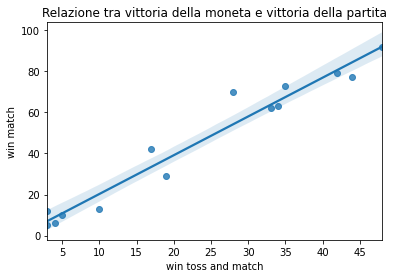

In [69]:
sns.regplot(x="equals", y="win", fit_reg=True, data=t_win2) 
plt.title("Relazione tra vittoria della moneta e vittoria della partita")
plt.xlabel("win toss and match")
plt.ylabel("win match")
plt.show()

### Le scelte delle squadre 

In [70]:
win_tdecision = pd.crosstab(t_win['decision'], matches['winner'])
win_tdecision.index = ['field','no_choice','bat']
win_tdecision

winner,---,Chennai Super Kings,Deccan Chargers,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
field,0,25,10,14,9,26,2,25,28,4,16,2,2,24,14
no_choice,1,36,15,31,4,31,4,39,45,8,31,7,3,35,21
bat,2,18,4,17,0,13,0,13,19,0,16,1,0,14,6


In [71]:
w = win_tdecision.transpose()
w.describe()

,field,no_choice,bat
count,15.000000,15.000000,15.000000
mean,13.400000,20.733333,8.200000
std,10.175601,15.406245,7.617649
min,0.000000,1.000000,0.000000
25%,3.000000,5.500000,0.500000
50%,14.000000,21.000000,6.000000
75%,24.500000,33.000000,15.000000
max,28.000000,45.000000,19.000000


### il tipo di punto e il numero di palle

In [72]:
ball_formatch = pd.DataFrame(deliveries['match_id'].value_counts())
ball_formatch = ball_formatch.sort_index()

lista = [matches['win_by_runs'], matches['win_by_wickets'], matches['id']]
wins = pd.DataFrame(lista).transpose().set_index('id')


wins = wins.join(ball_formatch)
wins.columns =['win_by_runs','win_by_wickets', 'balls']
wins


,win_by_runs,win_by_wickets,balls
id,,,
1,35,0,248
2,0,7,247
3,0,10,218
4,0,6,247
5,15,0,248
...,...,...,...
632,0,6,236
633,0,4,240
634,22,0,244


In [73]:
wins.describe()

,win_by_runs,win_by_wickets,balls
count,636.000000,636.000000,636.000000
mean,13.682390,3.372642,236.572327
std,23.908877,3.420338,22.946486
min,0.000000,0.000000,63.000000
25%,0.000000,0.000000,235.000000
50%,0.000000,4.000000,244.000000
75%,20.000000,7.000000,248.000000
max,146.000000,10.000000,267.000000


#### Inning

In [74]:
deliveries['inning'].value_counts()

1    78029
2    72350
3       43
4       38
Name: inning, dtype: int64

### Quante palle vengono lanciate per over

In [75]:
ball_over = pd.crosstab(deliveries['over'], deliveries['ball'])
ball_over

ball,1,2,3,4,5,6,7,8,9
over,,,,,,,,,
1,1284,1284,1284,1284,1281,1279,325,59,12
2,1271,1269,1269,1269,1269,1269,322,70,10
3,1270,1269,1269,1269,1269,1269,258,49,10
4,1270,1269,1269,1269,1269,1269,242,36,9
5,1270,1269,1268,1268,1268,1268,223,36,4
6,1267,1266,1265,1265,1264,1263,234,35,6
7,1264,1263,1263,1263,1263,1263,209,32,7
8,1263,1263,1262,1262,1262,1261,197,27,2
9,1257,1257,1257,1257,1257,1257,198,31,4


In [76]:
ball_over.describe()

ball,1,2,3,4,5,6,7,8,9
count,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000
mean,1219.850000,1216.500000,1213.050000,1210.10000,1206.150000,1202.050000,216.200000,33.95000,5.150000
std,78.534119,83.971486,90.654042,96.37367,103.412447,112.317911,47.223545,14.04682,3.328901
min,969.000000,947.000000,919.000000,896.00000,869.000000,829.000000,151.000000,13.00000,0.000000
25%,1207.250000,1205.750000,1202.250000,1200.00000,1196.000000,1194.250000,187.000000,24.50000,2.750000
50%,1253.500000,1253.000000,1252.500000,1252.00000,1251.000000,1251.000000,206.000000,33.00000,4.000000
75%,1267.750000,1266.750000,1265.750000,1265.75000,1265.000000,1264.250000,235.750000,37.75000,7.250000
max,1284.000000,1284.000000,1284.000000,1284.00000,1281.000000,1279.000000,325.000000,70.00000,12.000000


In [77]:
ball_over.iplot(kind='box', xTitle = 'La palla lanciata', yTitle = 'Il numero di volte in cui viene lanciata', title = 'Le palle lanciate negli over')

## CORRELAZIONE TRA LE VARIABILI

In [78]:
t1.corr()

,team1,team2,match_played,win,loss,win_rate,loss_rate,toss_winning
team1,1.000000,0.919633,0.978643,0.979096,0.912319,0.432474,-0.432474,0.973099
team2,0.919633,1.000000,0.980735,0.927068,0.975451,0.278882,-0.278882,0.968893
match_played,0.978643,0.980735,1.000000,0.972138,0.964249,0.361044,-0.361044,0.991045
win,0.979096,0.927068,0.972138,1.000000,0.875264,0.526458,-0.526458,0.975405
loss,0.912319,0.975451,0.964249,0.875264,1.000000,0.149764,-0.149764,0.942079
win_rate,0.432474,0.278882,0.361044,0.526458,0.149764,1.000000,-1.000000,0.378602
loss_rate,-0.432474,-0.278882,-0.361044,-0.526458,-0.149764,-1.000000,1.000000,-0.378602
toss_winning,0.973099,0.968893,0.991045,0.975405,0.942079,0.378602,-0.378602,1.000000


Text(0.5, 1.0, 'correletion heatmap')

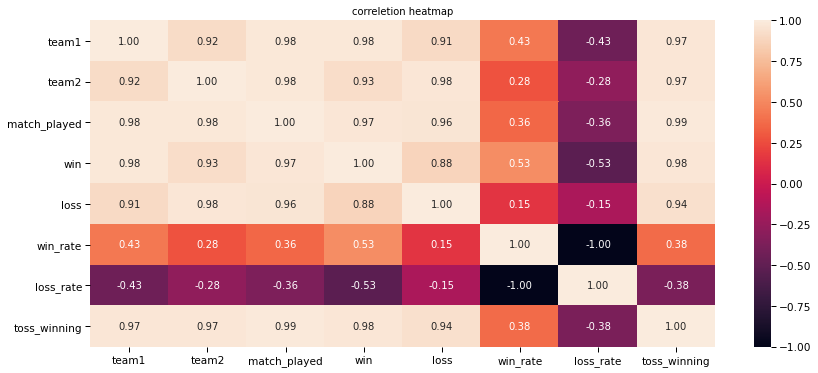

In [79]:
plt.rcParams["figure.figsize"]=[14,6]
sns.set_context("paper", font_scale=1.2, rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":8})
sns.heatmap(t1.corr(), annot=True, fmt=".2f")
plt.title("correletion heatmap")

In [80]:
matches['balls'] = wins['balls']
matches.corr()

,id,season,dl_applied,win_by_runs,win_by_wickets,balls
id,1.000000,0.471087,0.024281,-0.010263,-0.015510,-0.013921
season,0.471087,1.000000,0.004170,-0.016815,-0.000708,-0.030518
dl_applied,0.024281,0.004170,1.000000,-0.010893,-0.011640,-0.051607
win_by_runs,-0.010263,-0.016815,-0.010893,1.000000,-0.565181,0.002014
win_by_wickets,-0.015510,-0.000708,-0.011640,-0.565181,1.000000,0.022711
balls,-0.013921,-0.030518,-0.051607,0.002014,0.022711,1.000000


Text(0.5, 1.0, 'matches correletion heatmap')

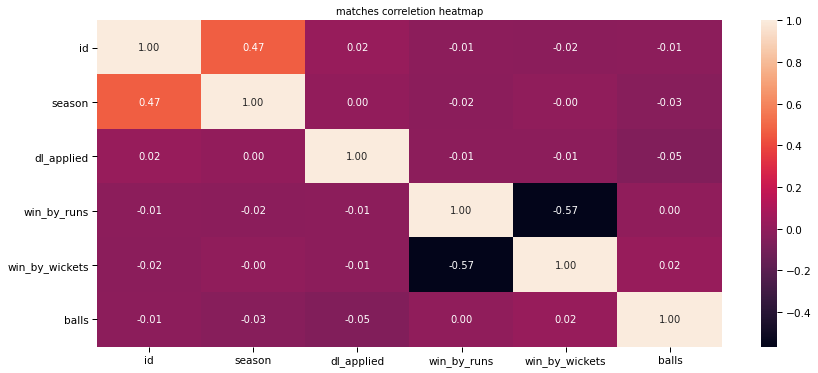

In [81]:
plt.rcParams["figure.figsize"]=[14,6]
sns.set_context("paper", font_scale=1.2, rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":8})
sns.heatmap(matches.corr(), annot=True, fmt=".2f")
plt.title("matches correletion heatmap")


In [82]:
deliveries.corr()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.000000,0.001033,0.004365,-0.002464,-0.001220,-0.004850,-0.004662,-0.004324,-0.005849,-0.000972,0.006273,-0.008833,0.004366
inning,0.001033,1.000000,-0.051496,-0.003618,0.091904,0.001055,-0.000395,-0.001385,0.000389,0.003763,-0.005668,0.000132,-0.005680
over,0.004365,-0.051496,1.000000,-0.010953,-0.037394,-0.016226,0.013669,-0.005907,0.015717,-0.001055,0.089945,-0.007649,0.088896
ball,-0.002464,-0.003618,-0.010953,1.000000,-0.001258,-0.005931,0.006755,-0.004449,0.002350,0.000774,0.008944,-0.004176,0.008086
is_super_over,-0.001220,0.091904,-0.037394,-0.001258,1.000000,-0.001155,0.001516,0.001717,0.014389,-0.000085,0.011497,0.003613,0.012377
wide_runs,-0.004850,0.001055,-0.016226,-0.005931,-0.001155,1.000000,-0.006230,-0.016186,-0.008703,0.013633,-0.111690,0.723726,0.047354
bye_runs,-0.004662,-0.000395,0.013669,0.006755,0.001516,-0.006230,1.000000,-0.004751,-0.002555,-0.000156,-0.032785,0.318850,0.037402
legbye_runs,-0.004324,-0.001385,-0.005907,-0.004449,0.001717,-0.016186,-0.004751,1.000000,-0.006637,-0.000405,-0.085177,0.557403,0.037322
noball_runs,-0.005849,0.000389,0.015717,0.002350,0.014389,-0.008703,-0.002555,-0.006637,1.000000,-0.000218,0.000272,0.196724,0.043722
penalty_runs,-0.000972,0.003763,-0.001055,0.000774,-0.000085,0.013633,-0.000156,-0.000405,-0.000218,1.000000,-0.002795,0.061842,0.010843


Text(0.5, 1.0, 'deliveries correlation heatmap')

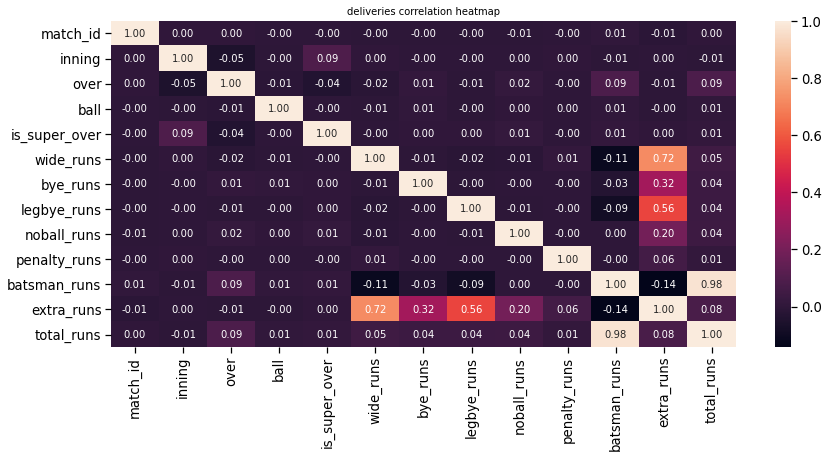

In [83]:
plt.rcParams["figure.figsize"]=[14,6]
sns.set_context("notebook", font_scale=1.2, rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":8})
sns.heatmap(deliveries.corr(), annot=True, fmt=".2f")
plt.title("deliveries correlation heatmap")

In [84]:
batsman.corr()

,bat,non striker,out,rate_out
bat,1.000000,0.997006,-0.020680,-0.220543
non striker,0.997006,1.000000,-0.020542,-0.219238
out,-0.020680,-0.020542,1.000000,-0.215608
rate_out,-0.220543,-0.219238,-0.215608,1.000000


Text(0.5, 1.0, 'battitori correlazione')

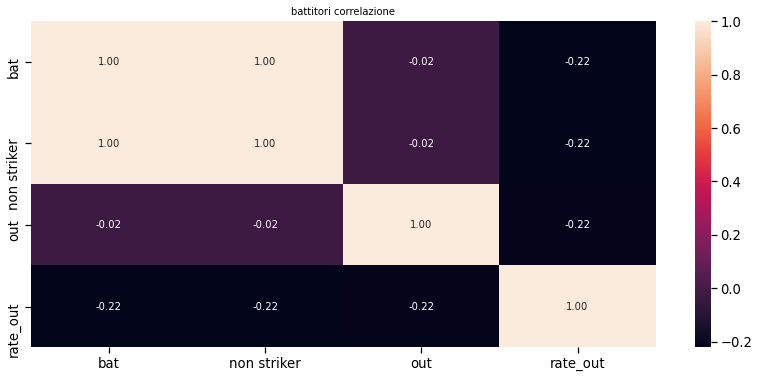

In [85]:
plt.rcParams["figure.figsize"]=[14,6]
sns.set_context("notebook", font_scale=1.2, rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":8})
sns.heatmap(batsman.corr(), annot=True, fmt=".2f")
plt.title("battitori correlazione")

### FOCUS ON 'Mumbai Indians'

#### Gli arbitri preferiti e con i quali vincono di più

In [86]:
m = pd.crosstab(matches['umpire1'], matches['winner'])
m.drop('---', inplace= True, axis =1)
mumb = pd.DataFrame(m['Mumbai Indians']).sort_values('Mumbai Indians', ascending = False)
mumb

,Mumbai Indians
umpire1,
HDPK Dharmasena,17
BR Doctrove,10
Asad Rauf,9
Nitin Menon,7
AK Chaudhary,6
S Ravi,5
M Erasmus,4
A Nand Kishore,3
RK Illingworth,3


### Percentuale di parite vinte in base al lancio della moneta e alla scelta successiva

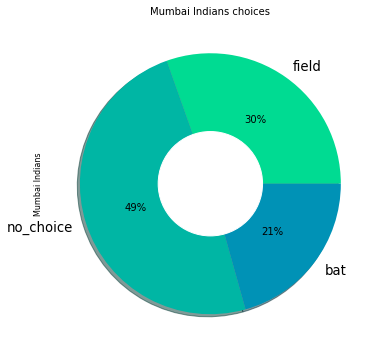

In [87]:
#win_tdecision['Mumbai Indians'].plot.pie(autopct = "%1.0f%%")
plt.figure(figsize = (6, 6))

win_tdecision['Mumbai Indians'].plot.pie(autopct = "%1.0f%%", colors = sns.color_palette('winter_r'), shadow = True)

c = plt.Circle((0, 0), 0.4, color = 'white') 
plt.gca().add_artist(c) 
plt.title('Mumbai Indians choices')
plt.show()